In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
# sys.path.insert(0, 'E:/MyRepositories/JobProjects/Аналитика_базы_данных/functions/')
sys.path.insert(0, '../functions/')
from out_dataframe import MyFrame

In [14]:
import warnings
warnings.simplefilter(action="ignore", category=Warning)

In [15]:
product = "водяной насос"  # изделие по которому будут строится графики
client = 'ММЗ'  # потребитель

In [16]:
# создаем датафреймы по годам
client_asp = f"{client} - АСП"   # потребитель АСП
client_gp = f"{client} - эксплуатация"  # потребитель ГП

df6 = MyFrame(2024, client_gp, product).get_frame()
df5 = MyFrame(2024, client_asp, product).get_frame()
# df4 = MyFrame(2023, client_gp, product).get_frame()
# df3 = MyFrame(2023, client_asp, product).get_frame()
# df2 = MyFrame(2022, client_gp, product).get_frame()
# df1 = MyFrame(2022, client_asp, product).get_frame()

In [17]:
# создаем сводный датафрейм из датафреймов по годам
# df = pd.concat([df1, df2, df3, df4])
df = pd.concat([df5, df6])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 32 to 1503
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Месяц регистрации                            336 non-null    datetime64[ns]
 1   Обозначение изделия                          336 non-null    object        
 2   Дата изготовления изделия                    131 non-null    datetime64[ns]
 3   Транспортное средство (установка)            255 non-null    object        
 4   Пробег, наработка                            336 non-null    int32         
 5   Причины возникновения дефектов               284 non-null    object        
 6   Пояснения к причинам возникновения дефектов  284 non-null    object        
 7   Поставщик дефектного комплектующего          259 non-null    object        
dtypes: datetime64[ns](2), int32(1), object(5)
memory usage: 22.3+ KB


In [7]:
df['Обозначение изделия'] = df['Обозначение изделия'].replace({'245-1307010-А1-11       (факт 240-1307010-А1)': '240-1307010-А1'})

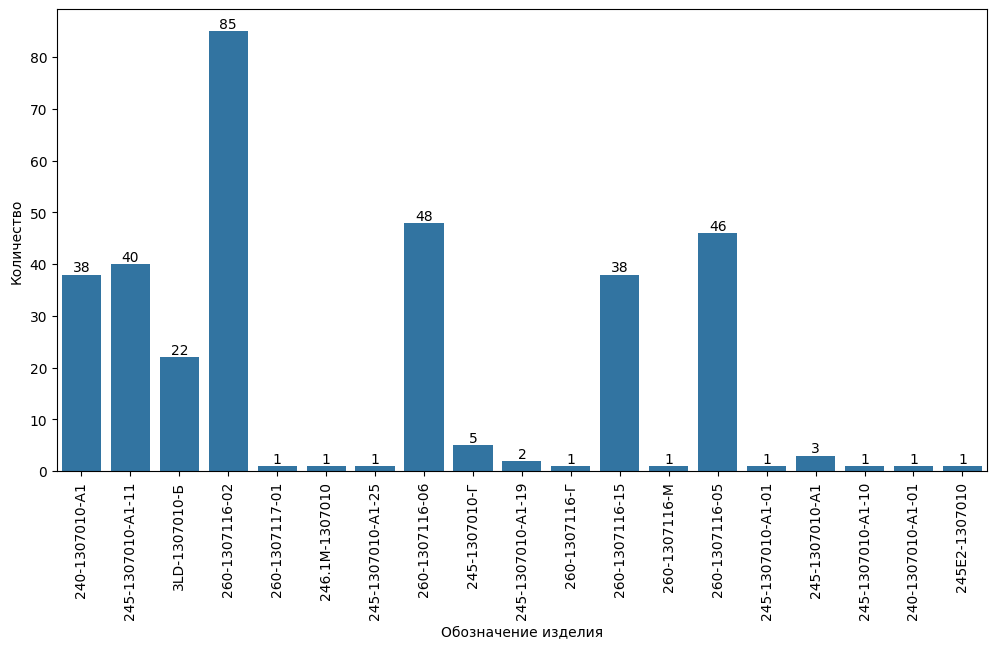

In [8]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Обозначение изделия')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylabel("Количество")
plt.xticks(rotation=90);

# Сохранение графика в файл
plt.savefig(f'Графики/{client}_{product}_по виду изделия.png')

In [9]:
df = df.sort_values(by='Месяц регистрации')
df['Месяц регистрации'] = df['Месяц регистрации'].dt.strftime('%Y-%m')

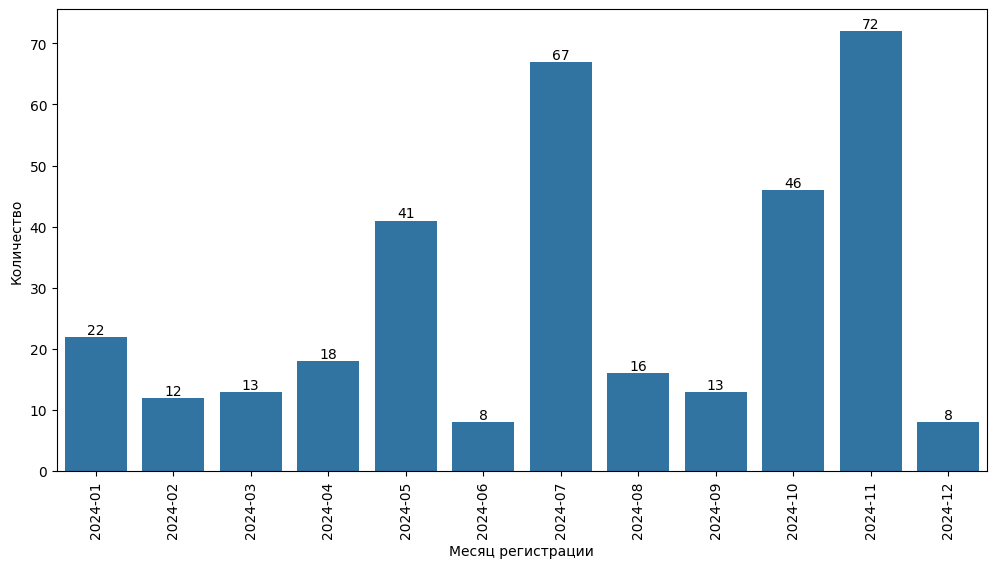

In [10]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Месяц регистрации')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylabel("Количество")
plt.xticks(rotation=90);

# Сохранение графика в файл
plt.savefig(f'Графики/{client}_{product}_по дате сообщения.png')

In [11]:
df_new = df.dropna(subset=['Дата изготовления изделия'])

df_new = df_new.sort_values(by='Дата изготовления изделия')
df_new["Дата изготовления изделия"] = df_new["Дата изготовления изделия"].dt.strftime('%Y-%m')

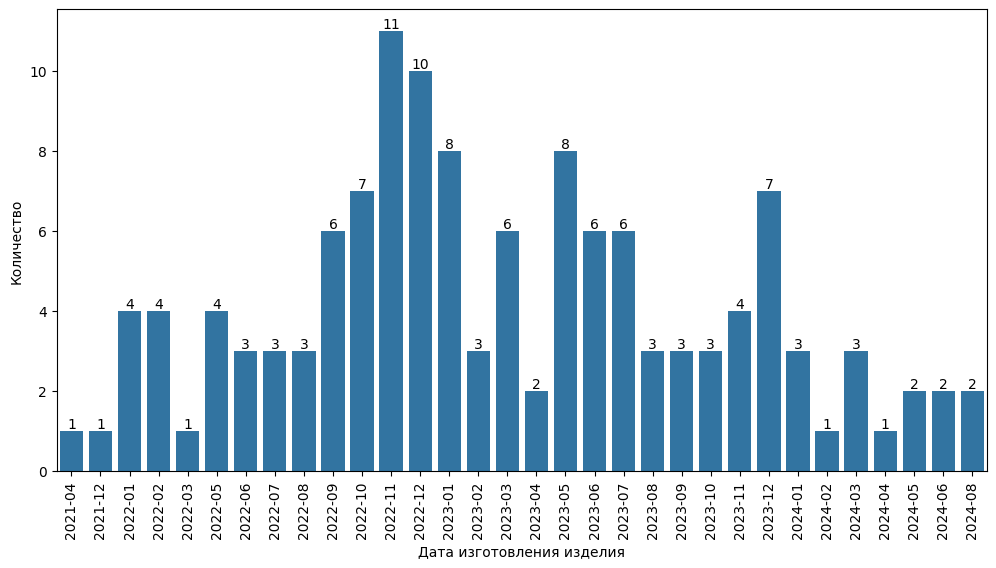

In [12]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_new, x=df_new['Дата изготовления изделия'].sort_values())
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylabel("Количество")
plt.xticks(rotation=90);

# Сохранение графика в файл
plt.savefig(f'Графики/{client}_{product}_по дате изготовления.png')